yolov8 설치

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 25.5 MB/s eta 0:00:00


필요한 라이브러리 임포트

In [2]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


사전 훈련된 YOLOv8 모델 로드

In [3]:
model = YOLO('yolov8n.pt')  # 또는 다른 크기의 모델 (s, m, l, x)

100%|██████████| 6.25M/6.25M [00:00<00:00, 85.4MB/s]


이미지 로드 및 객체 감지

In [6]:
image_path = '2.webp'
results = model(image_path)


image 1/1 /content/2.webp: 448x640 9 cars, 1 bus, 7.6ms
Speed: 3.5ms preprocess, 7.6ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


결과 시각화

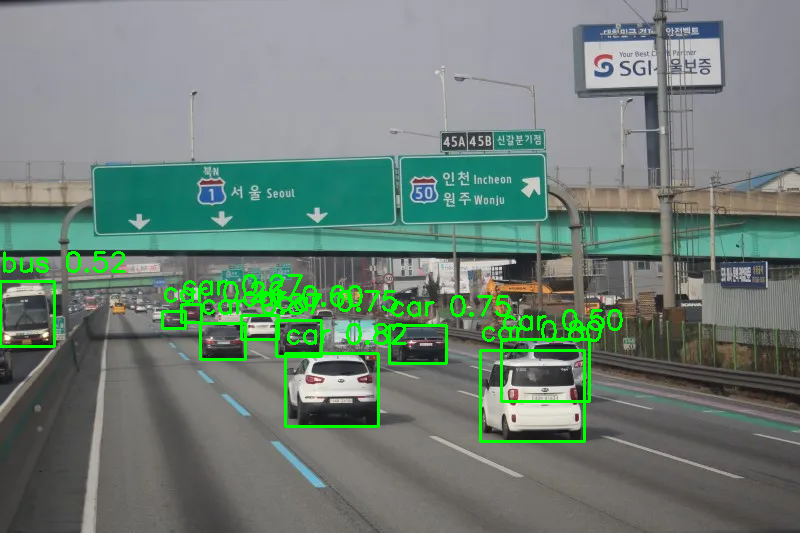

In [7]:
img = cv2.imread(image_path)
for r in results:
    boxes = r.boxes
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        conf = box.conf[0]
        cls = int(box.cls[0])
        label = model.names[cls]
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        cv2.putText(img, f'{label} {conf:.2f}', (int(x1), int(y1 - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

cv2_imshow(img)